In [2]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...


In [6]:
import requests
from bs4 import BeautifulSoup 
import time
from urllib.parse import urlparse, urljoin
from tqdm.notebook import tqdm
import pickle 
import spacy 
import ru_core_news_sm 
import string 
import nltk

In [7]:
nlp = ru_core_news_sm.load()

In [11]:
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]

In [12]:
# Parser for reviews
punctuations = string.punctuation
stopwords = russian_stopwords

In [13]:
def spacy_processor(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
text_data = [spacy_processor(text) for text in tqdm(df['text_lemm'])]

  0%|          | 0/5632 [00:00<?, ?it/s]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_df=0.8, 
                             min_df=5, 
                             ngram_range=(1, 2),
                             max_features=5000) 

data_vectorized = vectorizer.fit_transform(text_data)

In [30]:
data_vectorized[0].todense().shape

(1, 3574)

In [31]:
import pandas as pd
pd.DataFrame(data_vectorized.todense(), 
             columns=vectorizer.get_feature_names())

,al,and,app,app viber,apple,art,bank,bardzo,be,beer,...,іх,ўдзячна,ўдзячная,ўжо,ўкраіне,ўсе,ўсё,ўсім,ўсім падкажыце,ўсіх
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF

NUM_TOPICS = 15

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                max_iter=15, 
                                learning_method='online', 
                                verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [33]:
data_lsi.shape

(5632, 15)

In [34]:
lsi.components_.shape

(15, 3574)

In [35]:
data_lda.shape

(5632, 15)

In [36]:
lda.components_.shape

(15, 3574)

In [37]:
data_nmf.shape

(5632, 15)

In [38]:
nmf.components_.shape

(15, 3574)

In [39]:
def print_topics(model, vectorizer, n_words=17):
    for idx, topic in enumerate(model.components_):
        print()
        print(f'Topic {idx}:', [(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-n_words - 1:-1]]) 

In [40]:
print_topics(lsi, vectorizer)


Topic 0: [('варшава', 0.5164395198237843), ('польша', 0.3819380054672135), ('виза', 0.3316356738364366), ('беларусь', 0.22486926928456263), ('польский', 0.21345345541359687), ('карта', 0.19611311629744002), ('рб', 0.16600011237158044), ('ехать', 0.1299372675425241), ('граница', 0.11688330605138725), ('побыт', 0.10667399595960353), ('минск', 0.10573783255499065), ('опыт', 0.09962394762383626), ('паспорт', 0.09446294509005082), ('помогать', 0.0933554651736363), ('информация', 0.08252557298717234), ('месяц', 0.0816301064929253), ('выезжать', 0.07789747910776927)]

Topic 1: [('виза', 0.4073577073303842), ('польша', 0.2967956267427322), ('карта', 0.19560688396954107), ('рб', 0.11160258364486764), ('побыт', 0.11055322643468818), ('беларусь', 0.0951102661258057), ('граница', 0.07757469057556118), ('приглашение', 0.07639269735783687), ('паспорт', 0.07579049138388425), ('поляк', 0.06479775855396913), ('подаваться', 0.061020622086671264), ('выезжать', 0.060659304663684945), ('гуманитарный', 0.0

In [41]:
# evaluate as the best model
print_topics(nmf, vectorizer)


Topic 0: [('польша', 9.75849428920507), ('находиться', 0.6474094908203226), ('выезжать', 0.5324470843077433), ('территория', 0.525647446102091), ('беларусь польша', 0.46146099375875577), ('беларус', 0.3967501068453834), ('территория польша', 0.3842880352985828), ('информация', 0.37165179487149985), ('карантин', 0.3626161538089801), ('справка', 0.3264378957435554), ('въезд польша', 0.2985387250446713), ('находиться польша', 0.29456667320854746), ('въезд', 0.293056290170052), ('рб польша', 0.26507442048430385), ('украина', 0.26296027243581904), ('выезжать польша', 0.2612170230171136), ('въезжать', 0.2467336951553025)]

Topic 1: [('варшава', 5.40053813605474), ('минск', 0.19306940536483022), ('находиться', 0.1628803898359397), ('опыт', 0.1559330928368578), ('беларус', 0.15256775855301968), ('возможность', 0.12427545492503828), ('центр', 0.1155725400393452), ('жильё', 0.11511066943039268), ('приезжать', 0.11445960874566359), ('информация', 0.11440348166436953), ('контакт', 0.1142063221861

In [42]:
print_topics(lda, vectorizer)


Topic 0: [('беларусь', 396.1172841124335), ('банк', 157.29988240186375), ('польша', 153.15660895794917), ('счёт', 110.02830715679224), ('граница', 107.22286900077111), ('варшава', 85.36921192694726), ('польский', 81.53756629742193), ('регистрация', 77.03420259750794), ('брест', 74.56538029302445), ('проблема', 67.61095585863998), ('гражданин', 66.41861418529447), ('магазин', 58.90515240553913), ('беларусь польша', 58.85588862312894), ('беларус', 53.448305200141135), ('авто', 53.35769117844581), ('жыв', 53.322465577276006), ('переводить', 51.35885896586845)]

Topic 1: [('карта', 549.0775245012285), ('побыт', 310.1128809843107), ('поляк', 189.23915327861457), ('подаваться', 181.23237768354466), ('виза', 163.31102461669232), ('подача', 139.11110277234164), ('карта поляк', 126.93012695000051), ('карта побыт', 122.12647053704698), ('гражданство', 107.68001523901938), ('рб', 105.7408983994273), ('мама', 97.72152207455993), ('паспорт', 97.22538307651978), ('подавать', 90.09416503836658), ('п

In [43]:
#Visualisation of LSI

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import random
import pandas as pd

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [44]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lsi, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [45]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [46]:
source.head(20)

,x_umap,y_umap,x_tsne,y_tsne,topic,color
0,10.803359,-1.934191,-16.248903,25.322460,14,#95D8B4
1,10.383365,-0.529217,-22.125017,3.583147,5,#6F8A9E
2,13.992523,-1.029248,24.552837,17.856535,9,#D14C3A
3,11.298076,0.099153,-9.202599,26.253242,5,#6F8A9E
4,12.808440,3.266818,14.861156,-22.726587,0,#19931C
5,13.335905,1.246024,11.012249,-5.226171,0,#19931C
6,10.147733,0.935353,-28.207125,-16.380177,5,#6F8A9E
7,12.621490,3.039687,4.535703,-13.761297,0,#19931C
8,14.231654,1.922162,28.087969,-17.405329,7,#D037B4
9,9.070084,-1.775066,-28.877644,27.944960,2,#9D9D6B


In [47]:
print(source)

         x_umap    y_umap     x_tsne     y_tsne  topic    color
0     10.803359 -1.934191 -16.248903  25.322460     14  #95D8B4
1     10.383365 -0.529217 -22.125017   3.583147      5  #6F8A9E
2     13.992523 -1.029248  24.552837  17.856535      9  #D14C3A
3     11.298076  0.099153  -9.202599  26.253242      5  #6F8A9E
4     12.808440  3.266818  14.861156 -22.726587      0  #19931C
...         ...       ...        ...        ...    ...      ...
5627  10.219307  2.626633 -14.232369 -34.727150      5  #6F8A9E
5628  13.142753 -0.271690   2.741392 -45.427483      5  #6F8A9E
5629  14.258495 -1.665213 -39.472237   2.610850      1  #EC97B5
5630  14.423500 -1.654110   3.024311  24.402109      8  #15B2EF
5631  10.245642 -0.281078 -22.226355   6.610656      5  #6F8A9E

[5632 rows x 6 columns]


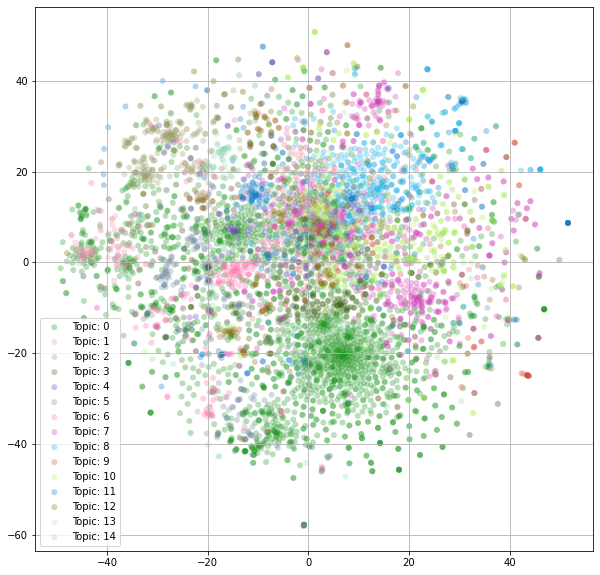

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

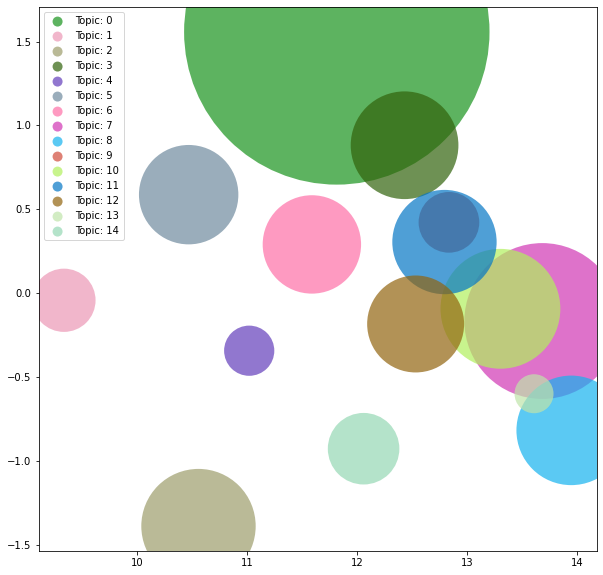

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [50]:
#Visualisation of NMF

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [51]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_nmf, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [52]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [53]:
source.head()

,x_umap,y_umap,x_tsne,y_tsne,topic,color
0,10.803359,-1.934191,-16.248903,25.322460,14,#B76C1E
1,10.383365,-0.529217,-22.125017,3.583147,5,#73CAE5
2,13.992523,-1.029248,24.552837,17.856535,9,#95C3F2
3,11.298076,0.099153,-9.202599,26.253242,5,#73CAE5
4,12.808440,3.266818,14.861156,-22.726587,1,#71B107


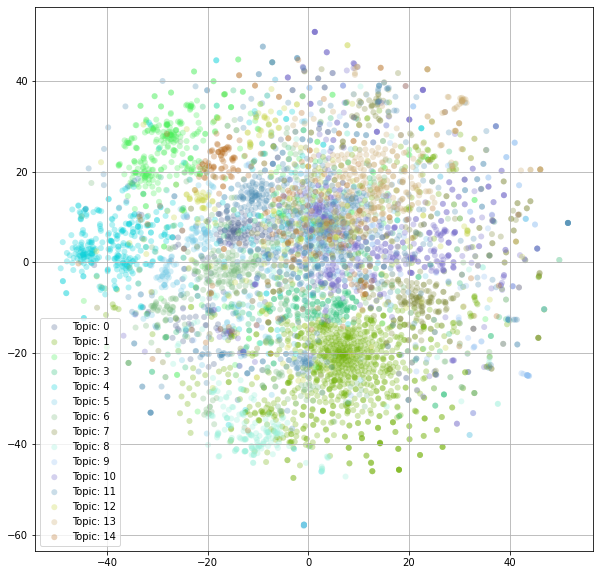

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

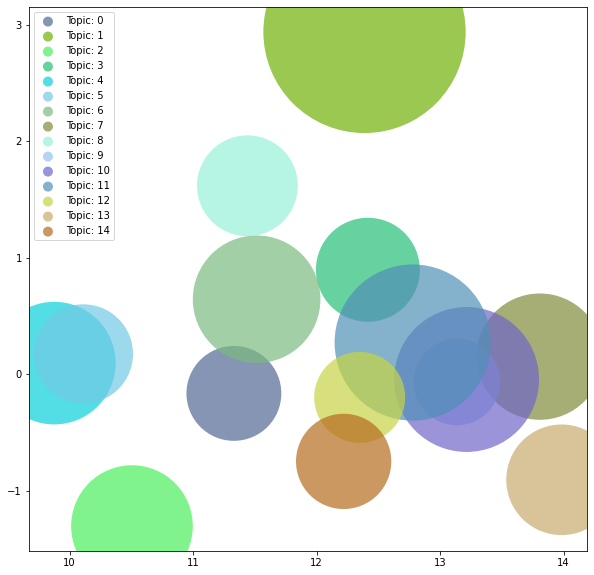

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [56]:
#Visualisation of LDA

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [57]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lda, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [58]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [59]:
source.head()

,x_umap,y_umap,x_tsne,y_tsne,topic,color
0,10.803359,-1.934191,-16.248903,25.322460,4,#BC87CC
1,10.383365,-0.529217,-22.125017,3.583147,12,#CF11B6
2,13.992523,-1.029248,24.552837,17.856535,7,#A2D60A
3,11.298076,0.099153,-9.202599,26.253242,12,#CF11B6
4,12.808440,3.266818,14.861156,-22.726587,10,#D9B3EC


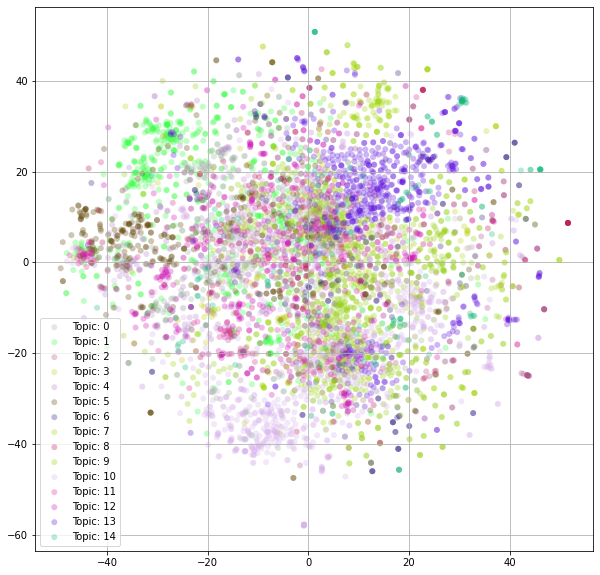

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() ## данные только с этим цветом
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

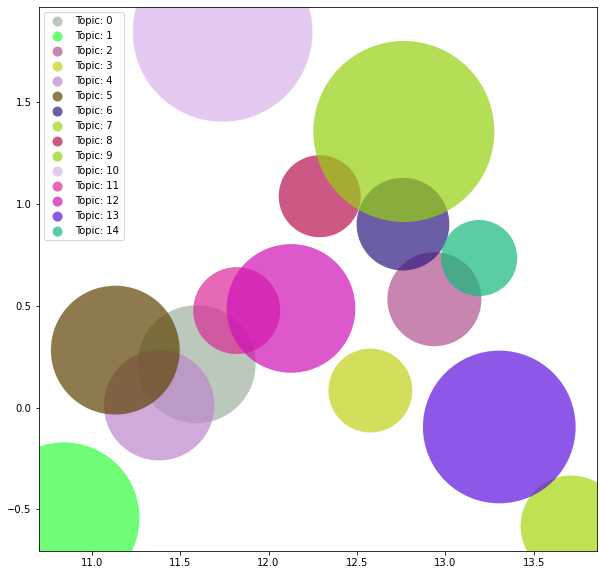

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() ## данные только с этим цветом
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [62]:
nmf.components_[0]

array([0.        , 0.        , 0.00564862, ..., 0.        , 0.        ,
       0.        ])

In [63]:
#the most characteristic word for topic 
np.argmax(nmf.components_[0])

2348

In [65]:
vectorizer.get_feature_names()[2348]

'польша'

In [66]:
nmf.components_

array([[0.        , 0.        , 0.00564862, ..., 0.        , 0.        ,
        0.        ],
       [0.00039306, 0.        , 0.00533751, ..., 0.02272534, 0.00347475,
        0.02506581],
       [0.        , 0.        , 0.        , ..., 0.00272189, 0.00409294,
        0.00170041],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0020154 , 0.00134328, 0.        , ..., 0.02003144, 0.00436248,
        0.01810488],
       [0.00355794, 0.00010573, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
lda.components_

array([[ 0.06666683,  0.0666667 ,  0.06666679, ...,  0.06666673,
         0.06666682,  0.06666673],
       [ 0.0666667 ,  0.06666669,  0.06666698, ...,  0.06666671,
         0.06666673,  0.0666667 ],
       [ 7.17481646,  0.06666671,  0.06666672, ...,  0.06666671,
         0.0666667 ,  0.0666667 ],
       ...,
       [ 0.06666701,  0.06666672,  0.06666676, ...,  0.06666671,
         0.0666667 ,  0.0666667 ],
       [ 0.06666721,  0.0666667 ,  0.0666667 , ..., 24.34148882,
         5.2569508 , 15.77236976],
       [ 0.06666681,  0.06666672,  0.06666672, ...,  0.06666689,
         0.06666676,  0.06666671]])

In [68]:
lda.components_[0]

array([0.06666683, 0.0666667 , 0.06666679, ..., 0.06666673, 0.06666682,
       0.06666673])

In [69]:
#the most characteristic word for topic 
np.argmax(lda.components_[0])

417

In [70]:
vectorizer.get_feature_names()[417]

'беларусь'

In [71]:
lsi.components_

array([[ 5.29823786e-04,  2.15575949e-05,  8.31360600e-04, ...,
         2.00066160e-03,  3.80916604e-04,  1.96924805e-03],
       [-5.64781684e-04, -1.80783551e-05, -8.83516933e-04, ...,
        -3.15157558e-03, -4.02694737e-04, -3.50618764e-03],
       [ 4.01113518e-04,  7.04089012e-06, -2.29018166e-04, ...,
         7.45117984e-04,  7.11020915e-04,  8.76149662e-04],
       ...,
       [-7.29784820e-04, -6.47775859e-06, -7.57788954e-05, ...,
        -4.53577796e-03, -1.27116544e-03, -4.45140937e-03],
       [ 3.13296320e-03, -4.98293787e-05,  6.31197101e-05, ...,
         3.80156487e-04, -8.21110800e-05, -4.39121435e-04],
       [ 2.51282960e-04, -1.16273600e-04,  1.45903082e-04, ...,
        -5.92253770e-03, -1.44236811e-03, -3.24120587e-03]])

In [72]:
lsi.components_[0]

array([5.29823786e-04, 2.15575949e-05, 8.31360600e-04, ...,
       2.00066160e-03, 3.80916604e-04, 1.96924805e-03])

In [73]:
#the most characteristic word for topic 
np.argmax(lsi.components_[0])

547

In [74]:
vectorizer.get_feature_names()[547]

'варшава'

In [75]:
nmf.components_.shape

(15, 3574)

In [76]:
lsi.components_.shape

(15, 3574)

In [77]:
lda.components_.shape

(15, 3574)

In [78]:
len(text_data)

5632

In [79]:
data_vectorized.shape

(5632, 3574)

In [80]:
#check nmf model for prediction
#posts from group 06/11/2022
import numpy as np
new_text = 'Здравствуйте, дорогие земляки! Подскажите, пожалуйста, можно ли находясь на территории Польши по рабочей действующей визе, гражданину РБ, поехать в Германию поездом? Проверяют ли паспорта у пассажиров и вообще  законно ли это? Не ориентируюсь совершенно в теперешней ситуации. Буду благодарна за любую информацию.'
new_corpus = [new_text]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

5

In [81]:
new_text2 = 'Делюсь информацией, если кому-то будет полезно: Сегодня забрала umiejscowienie aktu urodzenia. Делалось 1 месяц, вписали девичью фамилию матери на основании справки из загса о заключении брака родителей. Свидетельств отца и матери не просили даже показать.Urząd sranu cywilnego w Starych Babicach. Записывалась в конце июля на конец сентября'
new_corpus = [new_text2]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

9

In [89]:
new_text3 = 'Всем привет. Тут в группе упоминали чат-бот для поиска жилья. Может кто-нибудь дать ссылку на него? Не сохранила сразу. А сейчас по поиску пробовала разные варианты, не нашла 🥺 Буду очень благодарна'
new_corpus = [new_text3]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [90]:
new_text4 ='В новый салон в Варшаве требуются сотрудники: массажист (классический, лимфодренажный, антицеллюлитный) и косметолог. Официальное оформление. Заработная плата 4500 злотых нетто. Работа в две смены  по 8 часов в день. ( График обсуждаем) Перерыв между массажами 30 минут.🙏🏽Заинтересованным писать в личку'
new_corpus = [new_text4]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

9

In [91]:
new_text5 ='Здравствуйте. Можно ли устроиться на работу в школе учителем английского языка,  имея образование РБ и опыт работы в школе РБ.знание польского имеется Б1 здан екзамен'
new_corpus = [new_text5]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

5

In [92]:
next_text6 ='Доброго дня всем. Просмотрела предыдущие посты на тему. Прошу не путать психиатра и психолога. Нам нужен врач психиатр, консультация по СДВГ( синдром дефецита внимания гиперактивность). Подросток. Возможно кто то в Варшаве уже обращался к специалисту с таким конкретным запросом. Заранее благодарю.'
new_corpus = [next_text6]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))


11

In [93]:
next_text7 ='Всем здравствуйте. Может есть соотечественники с фирмой по изготовлению мебели. Нужно сделать каркас кровати не стандартный 140-190.'
new_corpus = [next_text7]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [94]:
next_text8 ='Доброго дня всем. По просьбе хозяев публикую объявление. Сдается 3х комнатная квартира в Варшаве/Wola. 65кв/м. Меблирована, есть вся техника, огромный балкон (20кв/м). место в подземном паркинге.По оплате 6000 PLN за все, включая воду/электричество/интернет.Прожили там полгода - тепло, соседей не слышно, проблем вообще никаких. Сьезжаем только потому, что не подходит район.'
new_corpus = [next_text8]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

7

In [95]:
next_text9 ='Добрый вечер! У меня такой вопрос, въехала в Польшу по рабочей визе, с приглашением рабочим, но по этому приглашению не работала, две недели назад выехала из страны по необходимости, какие мне нужны документы сейчас для пересечения границы? заранее благодарна за ответы'
new_corpus = [next_text9]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

0

In [96]:
next_text10 ='Добрый день. Может у кого есть белорусская карта и хотел бы поменять бел рубли с этой карты на злотые на польскую карту/наличку? Мне нужно произвести оплату в бел рублях, а оплата с польской карты у меня не проходит.'
new_corpus = [next_text10]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

2

In [111]:
# Getting the wordclouds from topics
max_df = 0.8 
min_df = 5
#max_features= 5000
cv = CountVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True)
#Fitting count vectorizer 
data_vectorized = vectorizer.fit_transform(text_data)

#getting the terms(features) generated by count vectorizer
terms = vectorizer.get_feature_names()

In [112]:
total_topics =15
# next step is to implement Latent Drichilet Allocation 
# next step is to implement NMF

nmf = NMF(n_components=total_topics)
nmfTransform = nmf.fit_transform(data_vectorized)



# lda = LatentDirichletAllocation(n_components=total_topics, 
#             max_iter=15,learning_method='online', 
#             learning_offset=15,random_state=1234)
# ldaTransform = lda.fit_transform(data_vectorized)

#declaring number of terms we need per topic
terms_count = 25

C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [113]:
vocabulary = vectorizer.get_feature_names()

In [132]:
for i, comp in enumerate(nmf.components_):
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
польша находиться выезжать территория беларусь польша беларус территория польша карантин информация справка въезд польша находиться польша въезд рб польша украина 

Topic 1: 
варшава минск находиться беларус возможность приезжать центр посоветовать жильё находиться варшава переезжать контакт минск варшава центр варшава апрель 

Topic 2: 
карта побыт поляк карта поляк карта побыт подаваться подача сталый получение сталый побыт подавать подаваться карта децизия побыт карта получение карта 

Topic 3: 
польский язык польский язык знание знание польский номер уровень перевод польский номер переводить требоваться водительский граница обязательно беларуский 

Topic 4: 
виза приглашение гуманитарный рабочий гуманитарный виза рабочий виза заканчиваться подаваться выезжать находиться подача продлять приезжать визовый центр 

Topic 5: 
рб рп граница авто рб рп номер выезд рб польша ездить пересечение доверенность договор пересечение граница посылка граница рб 

Topic 6: 
беларусь границ

In [115]:
from wordcloud import WordCloud


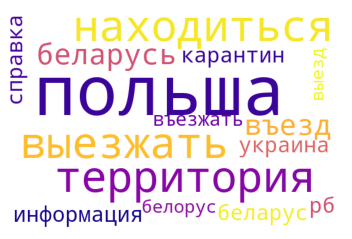

In [140]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = 'plasma')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_word_cloud(0)

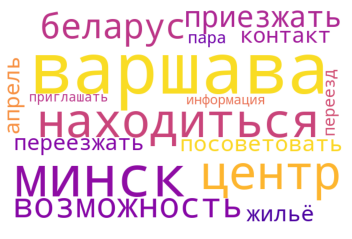

In [141]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='plasma')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(1)


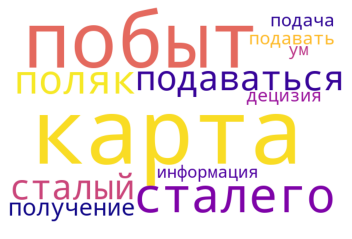

In [142]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(2)

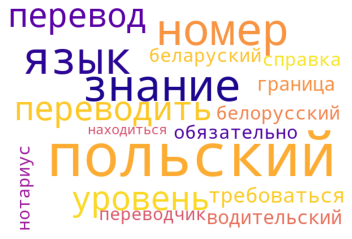

In [143]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(3)

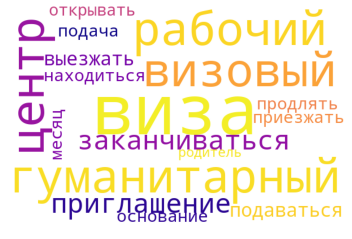

In [144]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(4)

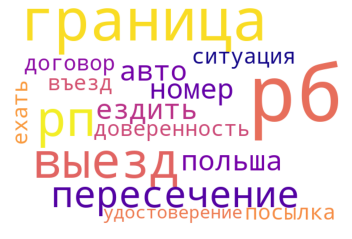

In [145]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(5)

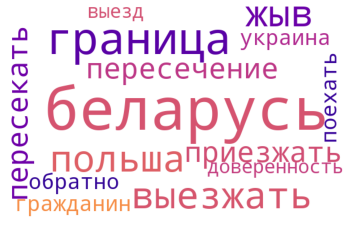

In [146]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(6)

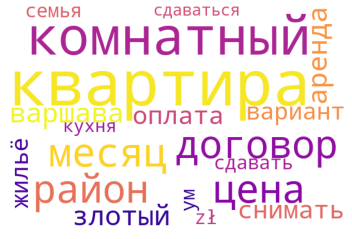

In [147]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(7)

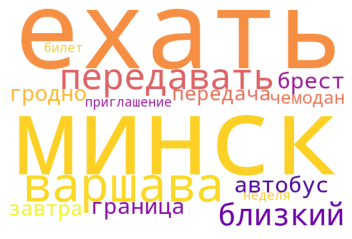

In [148]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(8)

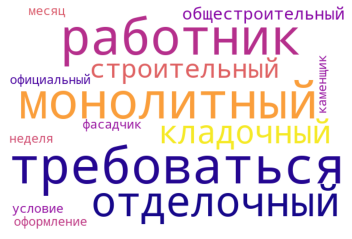

In [149]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(9)

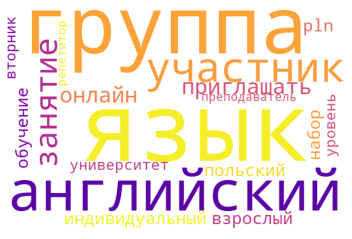

In [150]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(10)

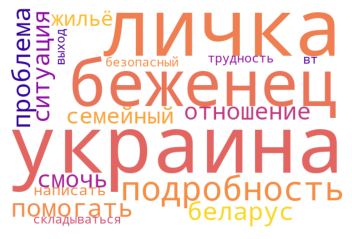

In [151]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(11)

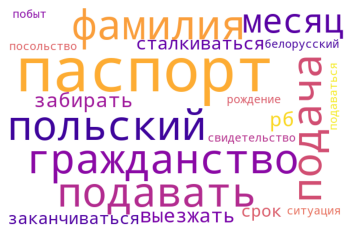

In [152]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(12)

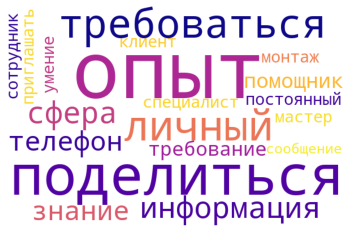

In [153]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(13)

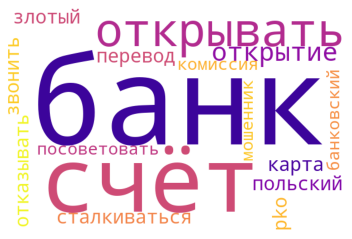

In [154]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = "plasma")
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(14)